# Dimer Spectral Density

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import mdtraj
import re

In [2]:
dt = 2

In [3]:
lines = list(open("dimer_trajectory.xyz").readlines())

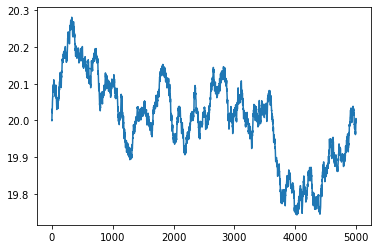

In [14]:
Mg1_pos = np.array([[float(y) for y in re.findall(r'-?\d+\.\d+', x)] for x in lines[2::282]])
Mg2_pos = np.array([[float(y) for y in re.findall(r'-?\d+\.\d+', x)] for x in lines[142::282]])

Mg_distances = np.linalg.norm(Mg2_pos - Mg1_pos, axis=1)

plt.plot(Mg_distances)


In [15]:
Mg_distances_from_mean = Mg_distances - np.mean(Mg_distances)
autocorr = scipy.signal.correlate(Mg_distances_from_mean, Mg_distances_from_mean, mode='full', method='fft')

In [16]:
spectrum = scipy.fft.fft(autocorr)
spectrum_normal_domain = np.fft.fftfreq(len(autocorr), dt)

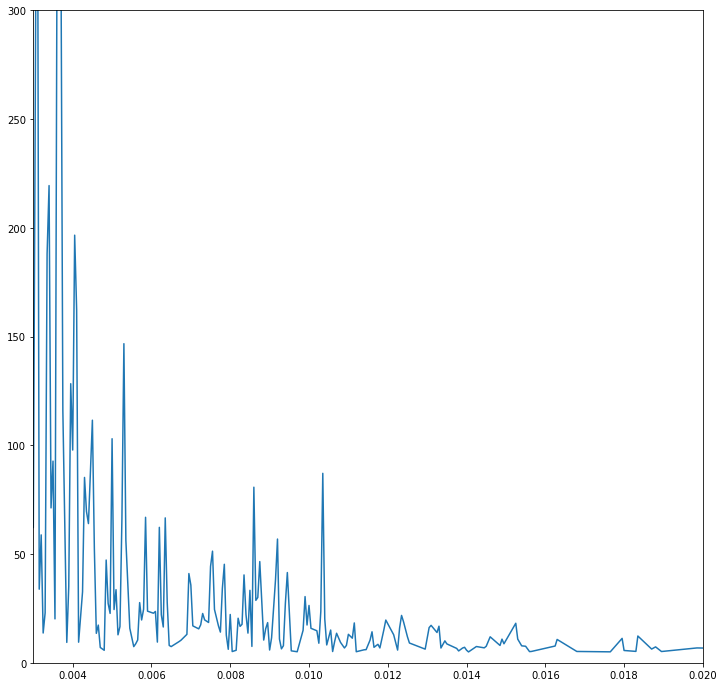

In [18]:
fig, ax = plt.subplots()

ax.set_xlim(3e-3, 2e-2)
ax.set_ylim(0, 300)

positive_freqs = np.where(spectrum_normal_domain > 0) 

contributions = np.where(abs(spectrum)[positive_freqs] > 5)[0]

limited_domain = spectrum_normal_domain[positive_freqs]
limited_spectrum = abs(spectrum)[positive_freqs]

plt.plot(limited_domain[contributions], limited_spectrum[contributions])

fig.set_size_inches(12, 12)

In [19]:
np.save("dimer_MD_frequencies", limited_domain)
np.save("dimer_MD_spectrum", limited_spectrum)